Launch interactive version: 👉👉👉 [![Try ``dyce``](https://jupyterlite.readthedocs.io/en/latest/_static/badge.svg)](https://posita.github.io/dyce-notebooks/lab?path=stack-exchange%2Fsum-of-highest-195988%2Fsum_of_highest.ipynb) 👈👈👈 *[[source](https://github.com/posita/dyce-notebooks/tree/main/notebooks/stack-exchange/sum-of-highest-195988)]*

## [``dyce``](https://posita.github.io/dyce/) solution to [“Is this doing what I think it's doing? Anydice - sum of highest rolled dice normalized for dice count”](https://rpg.stackexchange.com/a/195998/71245)

Once viewing this notebook in Jupyter Lab, select ``Run All Cells`` from the ``Run`` menu above.

In [1]:
# Install additional requirements if necessary
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        import anydyce
    except (ImportError, ModuleNotFoundError):
        requirements = ["anydyce~=0.2.0"]
        try:
            import piplite ; await piplite.install(requirements)
        except ImportError:
            import pip ; pip.main(["install"] + requirements)
    import anydyce

In [2]:
from dyce import H, P
from dyce.evaluation import PResult, foreach

d10 = H(10)

def mechanic(nd10: PResult):
    outcome_max = max(nd10.roll)
    # We are faithfully reproducing the approach here of (max * count). As alluded to
    # in the original question, we could have just as easily written something like:
    #   max_sum = sum(outcome for outcome in nd10_roll if outcome == outcome_max)
    count_max = sum(1 for outcome in nd10.roll if outcome == outcome_max)
    max_sum = outcome_max * count_max
    return max_sum

results = {
  n: foreach(mechanic, nd10=n@P(d10)) / n
  for n in range(2, 7)
}

from anydyce import BreakoutType, jupyter_visualize

jupyter_visualize(
    [(f"{n}d10\nmean: {h.mean():.3}", h) for n, h in results.items()],
    default_breakout_type=BreakoutType.BURST,
)

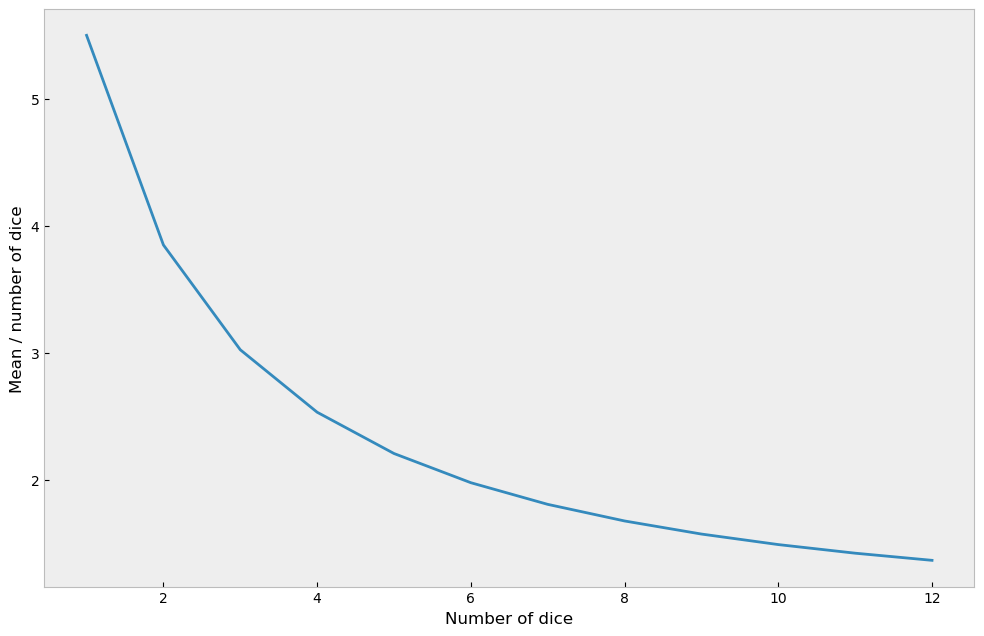

In [3]:
import matplotlib.pyplot

extended_results = {
  n: foreach(mechanic, nd10=n@P(d10))
  for n in range(1, 13)
}

x, y = zip(*((n, h.mean() / n) for n, h in extended_results.items()))

_, ax = matplotlib.pyplot.subplots()
ax.plot(x, y)
ax.set_xlabel('Number of dice')
ax.set_ylabel('Mean / number of dice')
ax.grid()
matplotlib.pyplot.show()